In [1]:
from IPython.display import display, Audio
import numpy as np
from scipy.io import wavfile
import sounddevice as sd
import time

In [2]:
file_name = "17. Climb" 
file_path = "library1/" + file_name + ".wav"  
sample_rate, audio_signal = wavfile.read(file_path)

# Print the sample rate
print("Sample Rate:")   
print(sample_rate)

channels = audio_signal.shape[1]
print(f"number of channels = {channels}")
length = audio_signal.shape[0] / sample_rate
print(f"length = {length}s")

# Print the audio signal
print("Raw audio signal:")
print(audio_signal[:, 0])

print("length of a channel of audio signal in samples:")
samples_length = len(audio_signal[:, 0])
print(samples_length)

# Play the audio
#Audio(file_path)




Sample Rate:
44100
number of channels = 2
length = 208.065306122449s
Raw audio signal:
[ 1 -1  0 ...  0  0  0]
length of a channel of audio signal in samples:
9175680


C:\Users\pc\AppData\Local\Temp\ipykernel_10444\1460342152.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_signal = wavfile.read(file_path)


In [3]:
import matplotlib.pyplot as plt
import numpy as np
# time = np.linspace(0., length, audio_signal.shape[0])
# plt.plot(time, audio_signal[:, 0], label="Left channel")
# plt.plot(time, audio_signal[:, 1], label="Right channel")
# plt.legend()
# plt.xlabel("Time [s]")
# plt.ylabel("Amplitude")
# plt.show()

In [4]:
from scipy.fft import fft, dct
from scipy.signal import hann
import scipy.signal

window_size = 100
samplesperseg = 1024
print(samplesperseg)
# The number of samples to overlap between adjacent segments
samplesoverlap = samplesperseg // 8

#sample 17
# Parameters for the spectrogram
f, t, Sxx = scipy.signal.spectrogram(audio_signal[:, 0], 
                                     fs = sample_rate, 
                                     window='hann',             # The window function to be applied to each segment of the signal.
                                     nperseg=samplesperseg,
                                     noverlap=samplesoverlap,   # noverlap must be less than nperseg.
                                     nfft=samplesperseg         # nfft must be greater than or equal to nperseg.
                                     )

1024


In [5]:
print(t.shape)
print(f.shape)
print(Sxx.shape)

print(t)
print(f)
# Sxxlog_file_path = "logs/" + "Sxx" + ".txt"
# np.savetxt(Sxxlog_file_path, Sxx)

(10240,)
(513,)
(513, 10240)
[1.16099773e-02 3.19274376e-02 5.22448980e-02 ... 2.08001451e+02
 2.08021769e+02 2.08042086e+02]
[    0.            43.06640625    86.1328125    129.19921875
   172.265625     215.33203125   258.3984375    301.46484375
   344.53125      387.59765625   430.6640625    473.73046875
   516.796875     559.86328125   602.9296875    645.99609375
   689.0625       732.12890625   775.1953125    818.26171875
   861.328125     904.39453125   947.4609375    990.52734375
  1033.59375     1076.66015625  1119.7265625   1162.79296875
  1205.859375    1248.92578125  1291.9921875   1335.05859375
  1378.125       1421.19140625  1464.2578125   1507.32421875
  1550.390625    1593.45703125  1636.5234375   1679.58984375
  1722.65625     1765.72265625  1808.7890625   1851.85546875
  1894.921875    1937.98828125  1981.0546875   2024.12109375
  2067.1875      2110.25390625  2153.3203125   2196.38671875
  2239.453125    2282.51953125  2325.5859375   2368.65234375
  2411.71875     245

In [6]:
# Plot spectrogram
# plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Use log scale for better visualization
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.colorbar(label='Power/Frequency (dB/Hz)')
# plt.show()

In [7]:
from scipy.ndimage import maximum_filter

# Define the neighborhood size:
window_size = 50
neighborhood_size = (window_size, window_size)

# Apply the maximum filter to identify local maxima in the spectrogram.
local_maxima = maximum_filter(Sxx, size=neighborhood_size) == Sxx
print(local_maxima)

# Extract the coordinates of the local maxima
maxima_coordinates = np.where(local_maxima == True)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [8]:
# Extract x and y coordinates from the constellation map


t_constellationvalues = t[np.array(maxima_coordinates[1])]
f_constellationvalues = f[np.array(maxima_coordinates[0])]

# print(np.array(x_coords))
# print(np.array(y_coords))
# Plot the constellation map
# plt.scatter(t_constellationvalues, f_constellationvalues, color='blue', marker='x')
# plt.xlabel('Time')
# plt.ylabel('Frequency')
# plt.title('Constellation Map')
# plt.show()

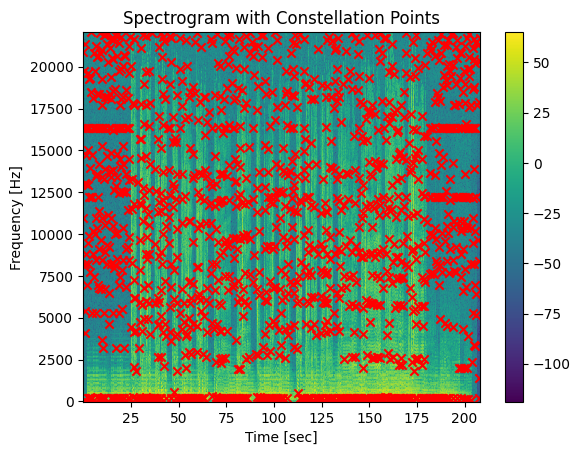

In [9]:
# Create the figure and axes
fig, ax = plt.subplots()
colormesh = ax.pcolormesh(t, f, 10 * np.log10(Sxx))  # Use log scale for better visualization
ax.scatter(t_constellationvalues, f_constellationvalues, color='red', marker='x')

# Set labels and title
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Frequency [Hz]')
ax.set_title('Spectrogram with Constellation Points')
cbar = fig.colorbar(colormesh)
plt.show()

In [10]:
# combinatorial hash generation
import hashlib

# target zone width in seconds
targetzone_width = 10

# target zone height in frequency
targetzone_height = 1000

constellation_points = list(zip(t_constellationvalues, f_constellationvalues))

anchor_points = list(zip(t_constellationvalues, f_constellationvalues))

# Create an empty list
hash_list = []

anchortime_list = []

# loop over every point in constellation as anchor point
for anchor_point in anchor_points:
    print("anchor point : ", anchor_point)
    t_anchor, f_anchor = anchor_point  # Unpack the point into individual variables
    # targetzone_left = t_anchor - targetzone_width / 2.0
    # targetzone_right = t_anchor + targetzone_width / 2.0

    targetzone_left = t_anchor + 0.1
    targetzone_right = t_anchor + 0.1 + targetzone_width

    targetzone_lowerlimit = f_anchor - targetzone_height / 2.0
    targetzone_upperlimit = f_anchor + targetzone_height / 2.0

    # loop over every point in the constellation in the target zone of the current anchor point 
    for constellation_point in constellation_points:
        t_constellation, f_constellation = constellation_point  # Unpack the point into individual variables

        # check if constellation point in the target zone of the current anchor point 
        if(targetzone_left <= t_constellation <= targetzone_right) and (targetzone_lowerlimit <= f_constellation <= targetzone_upperlimit) and (anchor_point != constellation_point):
            t1 = t_anchor
            f1 = f_anchor
            t2 = t_constellation
            f2 = f_constellation

            print("\t constellation point : ", constellation_point)
            delta_t = np.around(t2 - t1, 2)
            message = str(np.around(f1, 2)) + str(np.around(f2, 2)) + str(delta_t)
            md5_hash = hashlib.md5(message.encode()).hexdigest()
            hash_list.append(md5_hash)
            anchortime_list.append(t1)
            print("\t md5 Hash of ",message,  " is: ", md5_hash, "  ,t1: " ,t1)

anchor point :  (0.23510204081632652, 86.1328125)
	 constellation point :  (1.1087528344671203, 86.1328125)
	 md5 Hash of  86.1386.130.87  is:  42b4f7f54e03992409fe7a8af19e66c6   ,t1:  0.23510204081632652
	 constellation point :  (8.504308390022675, 172.265625)
	 md5 Hash of  86.13172.278.27  is:  0a4950009cab2db989d57b5321309fda   ,t1:  0.23510204081632652
	 constellation point :  (9.134149659863946, 172.265625)
	 md5 Hash of  86.13172.278.9  is:  edbbf64ce997092fc7959a3f5f926f88   ,t1:  0.23510204081632652
	 constellation point :  (2.3278004535147394, 215.33203125)
	 md5 Hash of  86.13215.332.09  is:  bdd1a8a6f26df20bbb0eff39c0fe8bf8   ,t1:  0.23510204081632652
	 constellation point :  (2.9779591836734696, 215.33203125)
	 md5 Hash of  86.13215.332.74  is:  3c5c5b0f9140faeb7915b1a8d7c43636   ,t1:  0.23510204081632652
	 constellation point :  (3.8109750566893426, 215.33203125)
	 md5 Hash of  86.13215.333.58  is:  707719f702f99cec3f10ffb16907aa02   ,t1:  0.23510204081632652
	 constellat

In [11]:
import pandas as pd

# Create a dictionary with the lists
data = {'hash': hash_list,
        'anchor time': anchortime_list}

# Create a DataFrame from the dictionary
hashes_df = pd.DataFrame(data)

print(hashes_df.shape)
hashes_df.head()

# Specify the file name
song_hash_filename = "logs/" + file_name + "_hashes" + ".txt"

# Write the DataFrame to a CSV file
hashes_df.to_csv(song_hash_filename, index=False)

(5095, 2)
